In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Food_Reviews/Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

In [5]:
# Setting Plot Style
plt.style.use('seaborn') 

In [6]:
#Total Rating Score 
data['Score'].value_counts()  

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

Text(0, 0.5, 'Total Reviews')

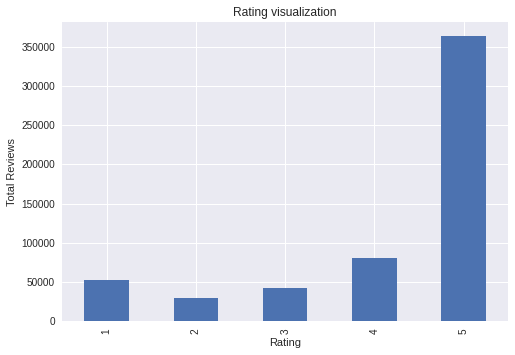

In [7]:
data['Score'].value_counts().sort_index().plot(kind='bar')  #value_count() used to produce a count for each of the unique values
plt.title('Rating visualization')                           #sort_index() is used so that the result is shown sorted by the score.
plt.xlabel('Rating')
plt.ylabel('Total Reviews')

In [8]:
data['ProductId'].value_counts()  #Total review For each Product

B007JFMH8M    913
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B0026RQTGE    632
             ... 
B005ZU8PCA      1
B003RURS00      1
B00028LN4C      1
B001P1YPMC      1
B000NPVDKS      1
Name: ProductId, Length: 74258, dtype: int64

In [9]:
Count_total = data.groupby(['ProductId','Score']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='ProductId')
Count_total

,ProductId,Score,count
0,B007JFMH8M,5,624
1,B003B3OOPA,5,517
2,B000NMJWZO,5,502
3,B002QWP8H0,5,498
4,B002QWP89S,5,498
...,...,...,...
137053,B002J9CXH8,5,1
137054,B002J9D02A,1,1
137062,B002J9J8EY,1,1
137067,B002JAU4VO,4,1


In [10]:
def findScore(productId):
  scrLst = []
  for i in range(len(data)):
    if data['ProductId'][i] == productId : 
      scrLst.append(data['Score'][i])
  return scrLst

In [11]:
scrLst = findScore('B007JFMH8M')

In [12]:
scr = pd.DataFrame(scrLst)

Text(0, 0.5, 'Total Reviews')

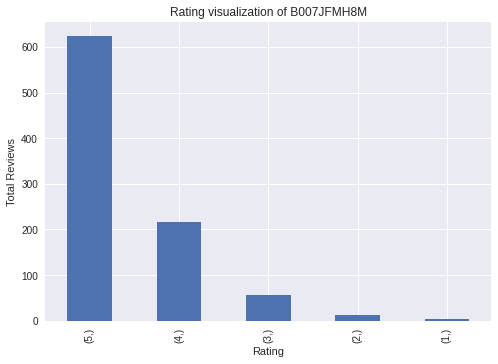

In [13]:
scr.value_counts().plot(kind='bar')  
plt.title('Rating visualization of B007JFMH8M')             
plt.xlabel('Rating')
plt.ylabel('Total Reviews')

In [14]:
words = pd.read_excel("/content/drive/MyDrive/Food_Reviews/Positive and Negative Word.xlsx")
words.head(10)

,Negative Sense Word List,Positive Sense Word List
0,bad,good
1,don't,tasty
2,expensive,nice
3,abnormal,abound
4,abolish,abounds
5,abominable,abundance
6,abominably,abundant
7,abominate,accelerate
8,abomination,accept
9,abort,accessable


In [15]:
from collections import Counter    
list = Counter(data["Summary"].to_string().split()).most_common(500) # Getting Most used Word For Review LIMIT to 300 Words

In [16]:
pos = words['Positive Sense Word List'].tolist()
neg = words['Negative Sense Word List'].tolist()

In [17]:
positive = []
negative = []
neutral = []
for i in list:
  temp =i[0].lower()
  if temp in pos:
    positive.append(temp)
  elif temp.lower() in neg:
    negative.append(temp)
  else:
    neutral.append(temp)

In [18]:
from wordcloud import WordCloud

In [19]:
def cloud(texts):
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(texts))
  word_cloud
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

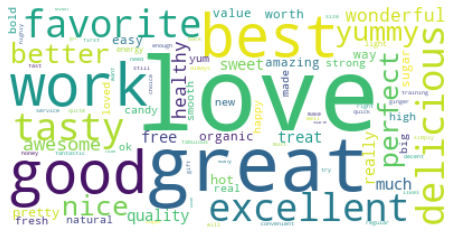

In [20]:
cloud(positive)   # for Positive Words

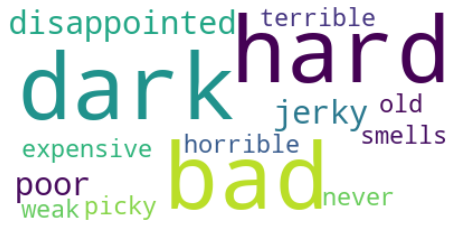

In [21]:
cloud(negative)  # for Negative Words

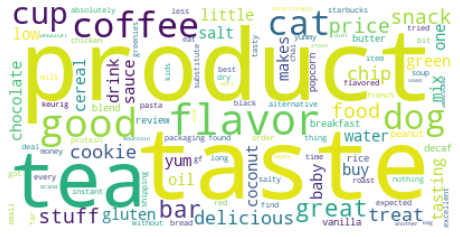

In [22]:
cloud(neutral) # for Neutral Words

In [23]:
positive_rate = [5,4]
negative_rate = [0,1,2]

In [24]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [25]:
def condition(x):
  if x['Score'] in positive_rate:
    return 'Positive'
  elif x['Score'] in negative_rate:
    return 'Negative'
  else:
    return 'Neutral'
  
data.apply(lambda x: condition(x), axis = 1)

0         Positive
1         Negative
2         Positive
3         Negative
4         Positive
            ...   
568449    Positive
568450    Negative
568451    Positive
568452    Positive
568453    Positive
Length: 568454, dtype: object